In [468]:
# Import the necessary packages for analyzing our data.

%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [469]:
# Load the dataset and save it as variable named nfl.
nfl = pd.read_csv('season_2021.csv')

# Inspect first 5 rows to see what the data looks like.
nfl.head()

,team_name,week,day,date,result,opponent,tm_score,opp_score,1stD_offense,TotYd_offense,PassY_offense,RushY_offense,TO_offense,1stD_defense,TotYd_defense,PassY_defense,RushY_defense,TO_defense
0,Arizona Cardinals,1,Sun,September 12,W,Tennessee Titans,38,13,22,416,280,136,1,17,248,162,86,3
1,Arizona Cardinals,2,Sun,September 19,W,Minnesota Vikings,34,33,21,474,371,103,2,22,419,242,177,0
2,Arizona Cardinals,3,Sun,September 26,W,Jacksonville Jaguars,31,19,23,407,316,91,1,20,361,202,159,4
3,Arizona Cardinals,4,Sun,October 3,W,Los Angeles Rams,37,20,27,465,249,216,0,24,401,280,121,2
4,Arizona Cardinals,5,Sun,October 10,W,San Francisco 49ers,17,10,20,304,210,94,1,19,338,186,152,1


In [470]:
# Tally up and print all the different outcomes from the 'result' column.
nfl['result'].value_counts()

result
W    284
L    284
T      2
Name: count, dtype: int64

In [471]:
# Dictionary containing the numerical values we want to replace our W's, L's, and T's with.
result_encoder = {'result': {'W': 1, 'T': 0, 'L': 0}}

# The replace method looks for values in our DataFrame that match the keys in result_encoder
# and replaces them with the corresponding value.
# inplace writes over the original values instead of returning a new DataFrame.
nfl.replace(result_encoder, inplace = True)

nfl['result'].value_counts()

result
0    286
1    284
Name: count, dtype: int64

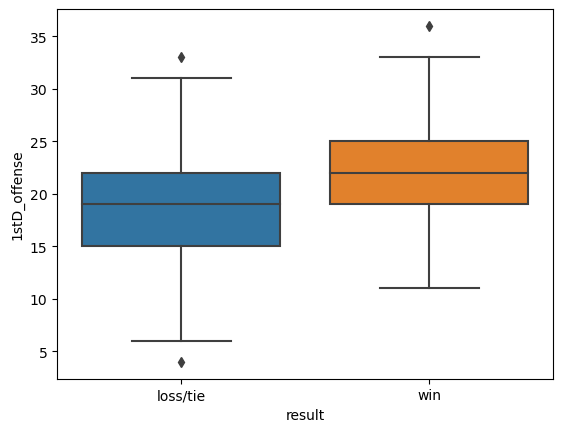

In [472]:
# Choosing a stat in our DataFrame to run a test plot with.
stat = '1stD_offense'

# Create box plot of test stat.
stat_plot = sns.boxplot(x = 'result', y = stat, data = nfl)

# Plot labels for our two categories: losses/ties and wins.
stat_plot.set_xticklabels(['loss/tie', 'win'])
plt.show()

In [473]:
# Select feature variables to be scaled.  
# In this case, we want all the rows, and only the columns at index 8 onwards.
features = nfl.iloc[:, 8:]

# Create a scaler.
scaler = StandardScaler()

# Fit the transformer to the features.
scaler.fit(features)

# Transform and save as X.
X = scaler.transform(features)

In [474]:
# Save result variable as y
y = nfl['result']

In [475]:
# Split the data into training and testing data.
# Training data we'll use to train our model to recognize winning games from patterns in the game stats.
# Testing data we'll use to check our model's accuracy.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)

In [476]:
# Create a LogisticRegression() classifier.
lrc = LogisticRegression()

# Fit the classifier to the training data.
lrc.fit(X_train, y_train)

LogisticRegression()

In [477]:
# Predict with our classifier (lrc) using the X_test test features.
y_pred = lrc.predict(X_test)

# View the model accuracy. Check the percentage of outcomes that our model predicted correctly
# by comparing our predicted test values (y_pred) to the true values (y_test).
accuracy_score(y_test, y_pred)

0.8280701754385965

In [478]:
# Create a list of regularization penalties (l1 and l2 regularization) for hyperparameter penalty.
penalties = ['l1', 'l2']

# Create a list of values for hyperparameter C (the inverse of regularization strength.)
# C applies a penalty to increasing the magnitude of parameter values in order to reduce overfitting.
C = [0.01, 0.1, 1.0, 10.0, 1000.0]

# Run a logistic regression on the data and get an accuracy score for each combination of penalty and C.

for penalty in penalties:
    for c in C:

        # Instantiate the classifier.
        lrc_tuned = LogisticRegression(penalty = penalty, C = c, solver = 'liblinear')

        # Fit the classifier to the training data.
        lrc_tuned.fit(X_train, y_train)
        
        # Predict with the classifier.
        y_pred = lrc_tuned.predict(X_test)

        # View the model accuracy.
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_rd = round(accuracy * 100, 1)
        
        # Print accuracy for each combination.
        print(f'Accuracy: {accuracy_rd}% | penalty = {penalty}, C = {c}')

Accuracy: 52.3% | penalty = l1, C = 0.01
Accuracy: 84.6% | penalty = l1, C = 0.1
Accuracy: 83.2% | penalty = l1, C = 1.0
Accuracy: 82.5% | penalty = l1, C = 10.0
Accuracy: 82.5% | penalty = l1, C = 1000.0
Accuracy: 80.4% | penalty = l2, C = 0.01
Accuracy: 83.5% | penalty = l2, C = 0.1
Accuracy: 82.8% | penalty = l2, C = 1.0
Accuracy: 82.5% | penalty = l2, C = 10.0
Accuracy: 82.5% | penalty = l2, C = 1000.0


In [479]:
# Set penalty and C to the optimal penalty and C from above results.
penalty = 'l1'
C = 0.1

# Create a list of test_sizes.
test_sizes = [val / 100 for val in range(20, 36)]

# For each test size...
for test_size in test_sizes:

    # Perform a train-test split.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 42)

    # Instantiate the classifier.
    lrc_tts = LogisticRegression(penalty = penalty, C = C, solver = 'liblinear')

    # Fit the classifier to the training data.
    lrc_tts.fit(X_train, y_train)

    # Predict with the classifier.
    y_pred = lrc_tts.predict(X_test)

    # View the model accuracy score.
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_rd = round(accuracy * 100, 1)
    
    # Print accuracy score for each combination of penalty and test size.
    print(f'Accuracy: {accuracy_rd}% | test size = {test_size}')

Accuracy: 87.7% | test size = 0.2
Accuracy: 87.5% | test size = 0.21
Accuracy: 87.3% | test size = 0.22
Accuracy: 87.9% | test size = 0.23
Accuracy: 88.3% | test size = 0.24
Accuracy: 88.8% | test size = 0.25
Accuracy: 87.9% | test size = 0.26
Accuracy: 88.3% | test size = 0.27
Accuracy: 88.1% | test size = 0.28
Accuracy: 88.6% | test size = 0.29
Accuracy: 87.1% | test size = 0.3
Accuracy: 87.6% | test size = 0.31
Accuracy: 86.9% | test size = 0.32
Accuracy: 87.3% | test size = 0.33
Accuracy: 86.1% | test size = 0.34
Accuracy: 86.0% | test size = 0.35


In [480]:
# Set the optimized test size and hyperparameters.
test_size =  0.25
penalty = 'l1'
C = 0.1

# Train-test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 42)

# Instantiate the optimized classifier.
optLr = LogisticRegression(penalty = penalty, C = C, solver = 'liblinear')

# Fit the optimized classifier to the training data.
optLr.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

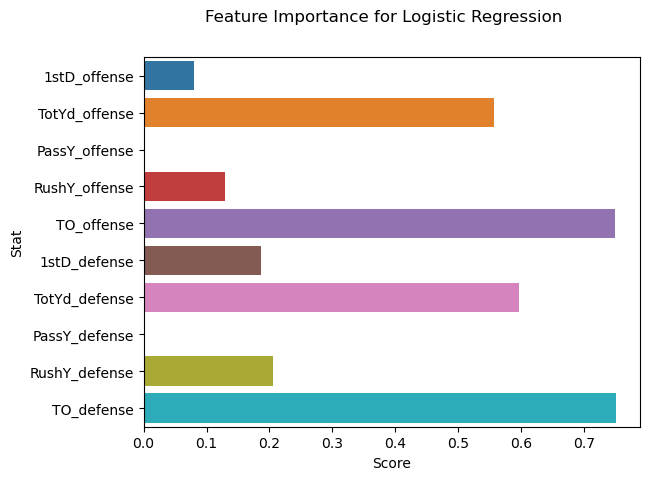

Feature: 1stD_offense, Score: 0.08
Feature: TotYd_offense, Score: 0.56
Feature: PassY_offense, Score: 0.0
Feature: RushY_offense, Score: 0.13
Feature: TO_offense, Score: 0.75
Feature: 1stD_defense, Score: 0.19
Feature: TotYd_defense, Score: 0.6
Feature: PassY_defense, Score: 0.0
Feature: RushY_defense, Score: 0.21
Feature: TO_defense, Score: 0.75


In [481]:
# Get importance (absolute values of the model coefficients.)
importance = abs(optLr.coef_[0])

# Visualize features and their importance.
sns.barplot(x = importance, y = features.columns)

# Set up plot.
plt.suptitle('Feature Importance for Logistic Regression')
plt.xlabel('Score')
plt.ylabel('Stat')
plt.show()

# Print out features and their importance.
for i, v in enumerate(importance.round(2)):
    print(f'Feature: {features.columns[i]}, Score: {v}')

In [482]:
# Load new dataset to try model on.
new_data = pd.read_csv('dallas-cowboys-2022.txt')

# Replace W's and L's with 1s and 0s.
new_data.replace(result_encoder, inplace = True)

# Inspect the first five rows.
new_data.head()

,team_name,week,day,date,result,opponent,tm_score,opp_score,1stD_offense,TotYd_offense,PassY_offense,RushY_offense,TO_offense,1stD_defense,TotYd_defense,PassY_defense,RushY_defense,TO_defense
0,Dallas Cowboys,1,Sun,September 11,0,Tampa Bay Buccaneers,3,19,12,244,173,71,1,18,347,195,152,1
1,Dallas Cowboys,2,Sun,September 18,1,Cincinnati Bengals,20,17,19,337,230,107,1,19,254,165,89,0
2,Dallas Cowboys,3,Mon,September 26,1,New York Giants,23,16,23,391,215,176,0,22,336,169,167,1
3,Dallas Cowboys,4,Sun,October 2,1,Washington Commanders,25,10,15,279,217,62,0,17,297,155,142,2
4,Dallas Cowboys,5,Sun,October 9,1,Los Angeles Rams,22,10,10,239,76,163,0,14,323,285,38,3


In [483]:
# Grab the same features used with our previous dataset.
new_X = new_data.loc[:, features.columns]

# Standardize using original data's scaling.
new_X_sc = scaler.transform(new_X)

# Get new predictions.
new_preds = optLr.predict(new_X_sc)

# Create new DataFrame of just the results.
new_results = new_data['result']

In [484]:
# Get accuracy score for new data.
acc_score = accuracy_score(new_results, new_preds)

In [485]:
# Select which columns we want to see in our comparison table.
col_names = ['team_name', 'week','opponent']
game_data = new_data.loc[:, col_names]

# Create comparison table.
comp_table = game_data.assign(predicted = new_preds, actual = new_results)

In [486]:
# Print title and table.
print('Predicted Wins vs Actual Wins for Dallas Cowboys in 2022')

comp_table.head(19)

Predicted Wins vs Actual Wins for Dallas Cowboys in 2022


,team_name,week,opponent,predicted,actual
0,Dallas Cowboys,1,Tampa Bay Buccaneers,0,0
1,Dallas Cowboys,2,Cincinnati Bengals,1,1
2,Dallas Cowboys,3,New York Giants,1,1
3,Dallas Cowboys,4,Washington Commanders,1,1
4,Dallas Cowboys,5,Los Angeles Rams,1,1
5,Dallas Cowboys,6,Philadelphia Eagles,0,0
6,Dallas Cowboys,7,Detroit Lions,1,1
7,Dallas Cowboys,8,Chicago Bears,1,1
8,Dallas Cowboys,9,Green Bay Packers,0,0
9,Dallas Cowboys,10,Minnesota Vikings,1,1


In [487]:
# Print accuracy.
print(f'\nCurrent Accuracy Score: ' + str(round(acc_score * 100, 1)) + '%')


Current Accuracy Score: 89.5%
